# MS figure generation

## Setup

In [5]:
import re, json, sys
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.ticker import MultipleLocator, AutoMinorLocator, ScalarFormatter
import numpy as np

# load internal functions
sys.path.append('../src')
from data_vis_utils import *

data_dir = Path('../../data')
figure_dir = Path('../../figures')

## Fig2

### Fig2a (CD scan)

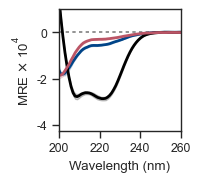

In [2]:
# c-reg
reg_dir = data_dir / 'CC-Hex2-AB-3-c' / '03_cd' / 'routine'

jobplot_dfs = [CircularDiochroismFunctions.make_cd_df(p) for p in reg_dir.glob('*.txt')]
jobplot_df = pd.concat(jobplot_dfs, ignore_index=True).fillna(0)

# Filter the blank data
blank_data = jobplot_df[jobplot_df['type'] == 'blank']

# Apply the subtraction function to the original DataFrame
jobplot_df['abs_zero_mdeg'] = jobplot_df.apply(
    CircularDiochroismFunctions.subtract_blank, 
    args=[blank_data], 
    axis=1
)

# Apply the wrapper function to calculate MRE for each row
jobplot_df['mre'] = jobplot_df.apply(CircularDiochroismFunctions.calc_mre_row, axis=1)

# plot data
sns.set(rc={'figure.figsize':[1.575,1.575], "font.family":"Arial"}, style='ticks', context='paper')

spectrum_ax = plt.subplot2grid((1,1), (0,0))

sns.lineplot(
    data=jobplot_df.query('type in ["pre", "post"] and wavelength_nm >= 200'),
    x='wavelength_nm',
    y='mre',
    hue='related_id',
    legend=None,
    errorbar='sd',
    hue_order=['CC-Hex2-A-3-c','CC-Hex2-A-3-c+CC-Hex2-B-3-c','CC-Hex2-B-3-c'],
    palette=['#004488', 'black','#bb5566'],
    ax=spectrum_ax,
    **{'lw':2}
)

spectrum_ax.set(
    xlim=[200,260],
    xlabel=r'Wavelength (nm)',
    ylabel=r'MRE $\times$ 10$\regular{^4}$',
    yticks=[0,-20_000,-40_000],
    yticklabels=[0,-2,-4],
    ylim=[-42500, 10_000]
)

spectrum_ax.axhline(0, dashes=(2,2), color='.5', zorder=0)

plt.savefig('../../figures/fig2/fig2a.svg', format='svg', transparent=True);


### Fig2b (CD melt)

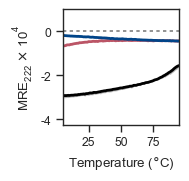

In [3]:
# c-reg
reg_dir = data_dir / 'CC-Hex2-AB-3-c' / '03_cd' / 'routine'

jobplot_dfs = [CircularDiochroismFunctions.make_cd_df(p) for p in reg_dir.glob('*.txt')]
jobplot_df = pd.concat(jobplot_dfs, ignore_index=True).fillna(0)

# Filter the blank data
blank_data = jobplot_df[jobplot_df['type'] == 'blank']

# Apply the subtraction function to the original DataFrame
jobplot_df['abs_zero_mdeg'] = jobplot_df.apply(
    CircularDiochroismFunctions.subtract_blank, 
    args=[blank_data], 
    axis=1
)

# Apply the wrapper function to calculate MRE for each row
jobplot_df['mre'] = jobplot_df.apply(CircularDiochroismFunctions.calc_mre_row, axis=1)

# plot the data
sns.set(rc={'figure.figsize':[1.5,1.5], "font.family":"Arial"}, style='ticks', context='paper')

melt_ax = plt.subplot2grid((1,1), (0,0))

sns.lineplot(
    data=jobplot_df.query('type in ["melt", "cool"]'),
    x='T_C',
    y='mre',
    hue='related_id',
    legend=None,
    errorbar='sd',
    hue_order=['CC-Hex2-A-3-c','CC-Hex2-A-3-c+CC-Hex2-B-3-c','CC-Hex2-B-3-c'],
    palette=['#bb5566', 'black', '#004488'],
    ax=melt_ax,
    **{'lw':2}
)

melt_ax.set(
    xlim=[5,95],
    xlabel=r'Temperature ($\degree$C)',
    ylabel=r'MRE$\regular{_{222}}$ $\times$ 10$\regular{^4}$',
    yticks=[0,-20_000,-40_000],
    yticklabels=[0,-2,-4],
    ylim=[-42500, 10_000]
)

melt_ax.axhline(0, dashes=(2,2), color='.5', zorder=0)

plt.savefig('../../figures/fig2/fig2b.svg', format='svg', transparent=True);

### Fig2c (SV plot)

[(0.0, 8.0), Text(0, 0.5, 'c(s)')]

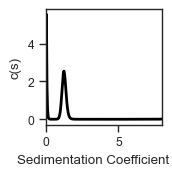

In [5]:
# sv 
sv_dir = Path('../../data/CC-Hex2-AB-3-c/04_sv/repeat_1')
auc_sv_data, auc_sv_bitmap, auc_sv_params = AUCanalysis.parse_sv(sv_dir, 2529.435)

sns.set(rc={'figure.figsize':[1.5,1.5], "font.family":"Arial"}, style='ticks', context='paper')

sv_ax = plt.subplot2grid((1,1), (0,0))

sns.lineplot(
    data=auc_sv_data, 
    x='Sedimentation Coefficient (S)', 
    y='c(s)', 
    color='black', 
    errorbar=None, 
    ax=sv_ax,
    **{'lw':2}
)
sv_ax.set(xlim=[0,8], ylabel=r"c(s)")

# plt.savefig('../../figures/fig2/fig2c.svg', format='svg', transparent=True);

### Fig2d (SE plot)

[Text(0, 0.5, 'A$_{280}$'), Text(0.5, 0, 'R$^2$-R$^2_0$ (cm)')]

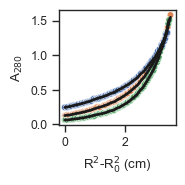

In [8]:
# se
auc_se = pd.read_csv('../../data/CC-Hex2-AB-3-c/05_se/repeat_1/20230915_84uM_CCHex2-A-c_84uM_CCHex2-B-c_25mM_280nm_HBS_2_tidy.csv')

auc_se['speed'] = auc_se['speed'].astype(str)
channel_to_plot = 'channel_3'

pal = ['#BB5566', '#DDAA33', '#004488']

se_ax = sns.lineplot(data=auc_se.query('data_type=="fit" and channel == @channel_to_plot and speed in ["24000","32000","40000"]'),
                x='radius',
                y='ab',
                hue='speed',
                palette=['k']*3,
                errorbar=None,
                legend=None,
                **{'lw':2}
)

sns.scatterplot(data=auc_se.query('data_type=="raw" and channel == @channel_to_plot and speed in ["24000","32000","40000"]'),
                x='radius',
                y='ab',
                ax=se_ax,
                hue='speed',
                legend=None)

se_ax.set(
    ylabel=r'A$_{280}$',
    xlabel=r'R$^2$-R$^2_0$ (cm)'
)


# plt.savefig('../../figures/fig2/fig2d.svg', format='svg', transparent=True);

### Fig2e (CD jobplot)

/var/folders/nr/f_s693214v54fjs9khpwyfnc0000gq/T/ipykernel_17894/2837650401.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  job_ax.set_xticklabels(['60:0', '50:10', '40:20', '30:30', '20:40', '50:10', '0:60'], rotation=-45)


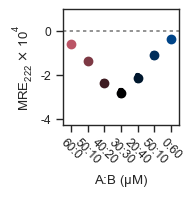

In [6]:
jobplot_dir = data_dir / 'CC-Hex2-AB-3-c' / '03_cd' / 'jobplot'
jobplot_paths = sorted(jobplot_dir.glob('*.txt'))

jobplot_dfs = [CircularDiochroismFunctions.make_cd_df(p) for p in jobplot_paths]
jobplot_df = pd.concat(jobplot_dfs, ignore_index=True).fillna(0)

# Filter the blank data
blank_data = jobplot_df[jobplot_df['type'] == 'blank']

# Apply the subtraction function to the original DataFrame
jobplot_df['abs_zero_mdeg'] = jobplot_df.apply(
    CircularDiochroismFunctions.subtract_blank, 
    args=[blank_data], 
    axis=1
)

# Apply the wrapper function to calculate MRE for each row
jobplot_df['mre'] = jobplot_df.apply(CircularDiochroismFunctions.calc_mre_row, axis=1)

# Make ratio id
jobplot_df['ratio'] = jobplot_df['conc_uM_1'].astype(str) + "_" + jobplot_df['conc_uM_2'].astype(str)

# List of unique labels in the order you want them to appear
label_order = [
    '60.0_0.0', '50.0_10.0', '40.0_20.0', '30.0_30.0', 
    '20.0_40.0', '10.0_50.0', '0.0_60.0'
]

# Convert the 'labels' column to a categorical data type with the given order
jobplot_df['ratio'] = pd.Categorical(jobplot_df['ratio'], categories=label_order, ordered=True)

# Sort the DataFrame based on the 'labels' column
jobplot_df = jobplot_df.sort_values('ratio')

# plot data
custom_palette = sns.blend_palette(['#bb5566', 'black', '#004488'], n_colors=7)

sns.set(rc={'figure.figsize':[1.5,1.5], "font.family":"Arial"}, style='ticks', context='paper')

job_ax = plt.subplot2grid((1,1), (0,0))

sns.pointplot(
    data = jobplot_df.query('wavelength_nm==222'),
    x='ratio', 
    y='mre', 
    hue='ratio', 
    errorbar='sd',
    palette=custom_palette,
    capsize=0.1,
    err_kws={'linewidth': 3},
    ax=job_ax
)
job_ax.get_legend().remove()
job_ax.set(
    xlabel=r'A:B ($\regular{\mu}M$)',
    ylabel=r'MRE$\regular{_{222}}$ $\times$ 10$\regular{^4}$',
    yticks=[0,-20_000,-40_000],
    yticklabels=[0,-2,-4],
    ylim=[-42500, 10_000]
)

job_ax.set_xticklabels(['60:0', '50:10', '40:20', '30:30', '20:40', '50:10', '0:60'], rotation=-45)

job_ax.axhline(0, dashes=(2,2), color='.5', zorder=0)

plt.savefig(figure_dir / 'fig2' / 'fig2e.svg', format='svg', transparent=True);

### Fig2f (DPH Binding)

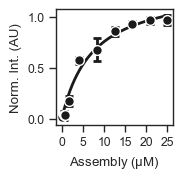

In [ ]:
# for p in data_dir.glob('**/06_dph/*.xlsx'):
#     analysis = DPHBindingAnalysis(p)
#     analysis.tidy_data()
#     analysis.fit_and_evaluate_model()
#     analysis.write_log()

dph_data = pd.read_csv(
    data_dir / 'CC-Hex2-AB-3-c/06_dph/20230907_2-5_150uM_CC-Hex2-AB-3-c_HBS_5pc_DMSO_1uM_DPH_t2.csv'
)
with open(data_dir / 'CC-Hex2-AB-3-c/06_dph/20230907_2-5_150uM_CC-Hex2-AB-3-c_HBS_5pc_DMSO_1uM_DPH_t2.json' 'r') as f:
    dph_params = json.load(f)

sns.set(rc={'figure.figsize':[1.5,1.5], "font.family":"Arial"}, style='ticks', context='paper')

dph_ax = plt.subplot2grid((1,1), (0,0))

x_raw = dph_data.groupby('conc_uM')['conc_uM'].mean()
y_raw = dph_data.groupby('conc_uM')['norm_int_AU'].mean()
yerr = dph_data.groupby('conc_uM')['norm_int_AU'].std()

x_values = np.linspace(0, max(dph_data['conc_uM']), 151)
y_values = DPHBindingAnalysis.single_site(x_values, *dph_params['fit_metrics']['params'])
dph_ax.errorbar(
    x_raw,
    y_raw,
    yerr=yerr,
    fmt='o',
    label='Data',
    color='k',
    mec='white',
    ms=7,
    capsize=3,
    elinewidth=2,
    capthick=2
)
dph_ax.plot(x_values, y_values, label='Fit', linewidth=2, color='k')
dph_ax.set(
    xticks=np.linspace(0,150, 6),
    xlabel=r'Assembly ($\regular{\mu}$M)',
    ylabel='Norm. Int. (AU)',
    xticklabels=[int(x/6) for x in np.linspace(0,150, 6)]
);

# plt.savefig('../figures/fig2/fig2f.svg', format='svg', transparent=True);


### Fig2h (quenching experiment)

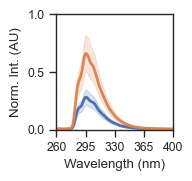

In [34]:
df_c = pd.DataFrame()
for txt in Path("../../data/CC-Hex2-AB-3-c/07_quenching").glob("*.txt"):
    df_c0 = pd.read_csv(txt, skiprows=18, names=['wavelength_nm', 'int'], sep='\t')
    df_c0["peptides"] = re.search("quenching_(.*)_[a-z]+_\d$", txt.stem).group(1)
    df_c0["repeat"] = txt.stem[-1]
    df_c0["annealing"] = re.search("([a-z]+)_\d$", txt.stem).group(1)
    df_c = pd.concat([df_c, df_c0], ignore_index=True)
df_c["int_norm"] = (df_c['int'] - df_c['int'].min()) / (df_c['int'].max() - df_c['int'].min())

sns.set(rc={'figure.figsize':[1.5,1.5], "font.family":"Arial"}, style='ticks', context='paper')

quench_ax = plt.subplot2grid((1,1), (0,0))

sns.lineplot(
    data=df_c.query('annealing == "post"'),
    y='int_norm',
    x='wavelength_nm',
    errorbar='sd',
    estimator=np.mean,
    hue_order = ["CC-Hex2-A-3-c-cMSe_CC-Hex2-B-3-c-n4CF", "CC-Hex2-A-3-c-cMSe_CC-Hex2-B-3-c-c4CF"],
    hue='peptides',
    legend = None,
    **{'lw':2}
)

quench_ax.set(
    xticks=np.linspace(260,400, 5),
    xlim=[260,400],
    ylim=[0,1],
    yticks=[0,0.5,1],
    ylabel = r'Norm. Int. (AU)',
    xlabel="Wavelength (nm)"
);

# plt.savefig('../../figures/fig2/fig2h.svg', format='svg', transparent=True);


## Fig3

### Fig3b (g-reg quenching)

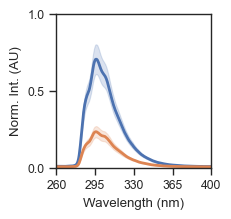

In [45]:
# g-reg fluorescence assay

df_g = pd.DataFrame()
for txt in Path("../data/cchex2ab-g/07_quenching").glob("*.txt"):
    df_g0 = pd.read_csv(txt, skiprows=18, names=['wavelength_nm', 'int'], sep='\t')
    df_g0["peptides"] = re.search("quenching_(.*)_[a-z]+_\d$", txt.stem).group(1)
    df_g0["repeat"] = txt.stem[-1]
    df_g0["annealing"] = re.search("([a-z]+)_\d$", txt.stem).group(1)
    df_g = pd.concat([df_g, df_g0], ignore_index=True)
df_g["int_norm"] = (df_g['int'] - df_g['int'].min()) / (df_g['int'].max() - df_g['int'].min())

df_g.peptides.unique()

sns.set(rc={'figure.figsize':[2,2], "font.family":"Arial"}, style='ticks', context='paper')

quench_ax_g = sns.lineplot(
    data=df_g,
    y='int_norm',
    x='wavelength_nm',
    errorbar='sd',
    estimator=np.mean,
    hue_order = ["CCHex2A-g-Mse_CCHex2B-g-CNF1", "CCHex2A-g-Mse_CCHex2B-g-CNF2"],
    hue='peptides',
    legend = None,
    **{'lw':2}
)

quench_ax_g.set(
    xticks=np.linspace(260,400, 5),
    xlim=[260,400],
    ylim=[0,1],
    yticks=[0,0.5,1],
    ylabel = r'Norm. Int. (AU)',
    xlabel="Wavelength (nm)"
)

plt.savefig('../figures/fig3/fig3b.svg', format='svg', transparent=True);

### Fig3c (b-reg quenching)

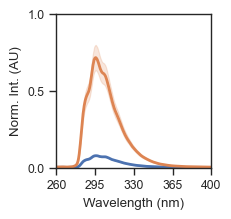

In [46]:
# b-reg fluorescence assay

df_b = pd.DataFrame()
for txt in Path("../data/cchex2ab-b/07_quenching").glob("*.txt"):
    df_b0 = pd.read_csv(txt, skiprows=18, names=['wavelength_nm', 'int'], sep='\t')
    df_b0["peptides"] = re.search("quenching_(.*)_t*\d", txt.stem).group(1)
    df_b0["repeat"] = txt.stem[-1]
    # df_b0["annealing"] = re.search("([a-z]+)_\d$", txt.stem).group(1)
    df_b = pd.concat([df_b, df_b0], ignore_index=True)
df_b["int_norm"] = (df_b['int'] - df_b['int'].min()) / (df_b['int'].max() - df_b['int'].min())

sns.set(rc={'figure.figsize':[2,2], "font.family":"Arial"}, style='ticks', context='paper')

quench_ax_b = sns.lineplot(
    data=df_b,
    y='int_norm',
    x='wavelength_nm',
    errorbar='sd',
    estimator=np.mean,
    hue_order = ["CCHex2A-b-Mse_CCHex2B-b-CNF1_t30", "CCHex2A-b-Mse_CCHex2B-b-CNF2_t30"],
    hue='peptides',
    legend = None,
    **{'lw':2}
)

quench_ax_b.set(
    xticks=np.linspace(260,400, 5),
    xlim=[260,400],
    ylim=[0,1],
    yticks=[0,0.5,1],
    ylabel = r'Norm. Int. (AU)',
    xlabel="Wavelength (nm)"
)

plt.savefig('../figures/fig3/fig3c.svg', format='svg', transparent=True);

## Fig4

### Fig4e

/var/folders/nr/f_s693214v54fjs9khpwyfnc0000gq/T/ipykernel_32580/2328307641.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(
/var/folders/nr/f_s693214v54fjs9khpwyfnc0000gq/T/ipykernel_32580/2328307641.py:8: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  g = sns.barplot(
/var/folders/nr/f_s693214v54fjs9khpwyfnc0000gq/T/ipykernel_32580/2328307641.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), fontstyle='italic', fontweight='bold');


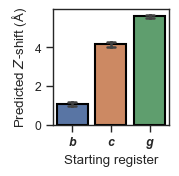

In [15]:

# load in the AF2 analysis
dZ_df = pd.read_csv('../../data/colabfold/af_scores_dZ.csv')

# Set up the plotting parameters using seaborn (small figure size, specific style and context)
sns.set(rc={'figure.figsize': [1.5, 1.5]}, style='ticks', context='paper')

# Create a bar plot of the Z-shift ('dZ') for anti-parallel ('ap') structures where ipTM > 0.7
g = sns.barplot(
    data=dZ_df.query('orientation=="ap" and register in ["g", "b", "c"] and iptm > 0.7'), 
    x='register', 
    y='dZ', 
    errorbar='sd', 
    edgecolor='black', 
    lw=1.5, 
    capsize=0.2,
    palette=sns.color_palette()
)

# Set axis labels and modify tick labels with italic font style and bold weight
g.set(xlabel='Starting register', ylabel=r'Predicted $Z$-shift (Å)')
g.set_xticklabels(g.get_xticklabels(), fontstyle='italic', fontweight='bold');
